# Catalogue Scoring Mechanism

## BY TEAM CODE GEEKS

## Importing required libraries

In [13]:
import pandas as pd
import numpy as np

## Generating dataset

In [2]:
# Generate synthetic data for 2000 items
np.random.seed(42)

data = {
    'Labelling_Compliance': np.random.uniform(0, 1, 2000),
    'Display_Compliance': np.random.uniform(0, 1, 2000),
    'Branding_Compliance': np.random.uniform(0, 1, 2000),
    'Brand_Authenticity': np.random.uniform(0, 1, 2000),
    'Info_Accuracy': np.random.uniform(0, 1, 2000),
    'Image_Availability': np.random.uniform(0, 1, 2000),
    'Pricing_Info': np.random.uniform(0, 1, 2000),
    'Descriptions': np.random.uniform(0, 1, 2000)
}

df = pd.DataFrame(data)

weights = {
    'Labelling_Compliance': 0.1,
    'Display_Compliance': 0.15,
    'Branding_Compliance': 0.15,
    'Brand_Authenticity': 0.2,
    'Info_Accuracy': 0.1,
    'Image_Availability': 0.2,
    'Pricing_Info': 0.15,
    'Descriptions': 0.1,
}

# Calculate the 'Score' based on the weighted sum of parameters
df['Score'] = df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1) * 100

# Save the synthetic dataset to a CSV file
df.to_csv('catalog_dataset.csv', index=False)

In [3]:
df

,Labelling_Compliance,Display_Compliance,Branding_Compliance,Brand_Authenticity,Info_Accuracy,Image_Availability,Pricing_Info,Descriptions,Score
0,0.374540,0.261706,0.571996,0.648257,0.720268,0.373641,0.654306,0.073175,54.437905
1,0.950714,0.246979,0.805432,0.172386,0.687283,0.332912,0.080033,0.089478,44.367382
2,0.731994,0.906255,0.760161,0.872395,0.095754,0.176154,0.242330,0.651974,64.399368
3,0.598658,0.249546,0.153900,0.613116,0.922572,0.607267,0.773679,0.486941,62.146256
4,0.156019,0.271950,0.149249,0.157204,0.568472,0.476624,0.528686,0.790415,42.073898
...,...,...,...,...,...,...,...,...,...
1995,0.656955,0.442107,0.684435,0.273160,0.857656,0.004644,0.424338,0.007591,44.041316
1996,0.956615,0.334401,0.503220,0.209519,0.897509,0.873669,0.915691,0.572671,72.231392
1997,0.068958,0.394572,0.765149,0.455329,0.946708,0.307325,0.497938,0.717187,57.446495
1998,0.057055,0.529941,0.485291,0.908438,0.397488,0.938589,0.398837,0.745080,70.147775


In [19]:
import seaborn as sb
import matplotlib.pyplot as pt

<Axes: ylabel='Score'>

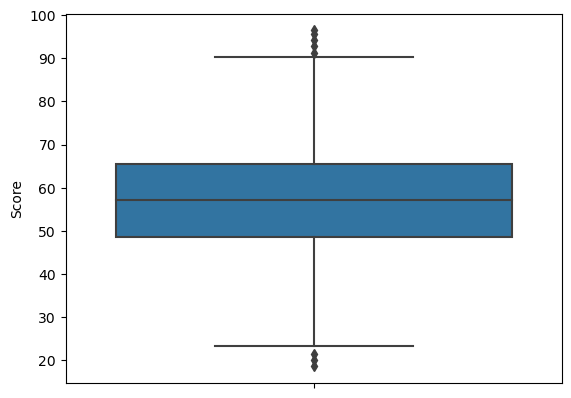

In [20]:
sb.boxplot(data=df, y='Score')

## Importing SVM Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
# Separate features and target variable
X = df.drop('Score', axis=1)
y = df['Score']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing features

In [7]:
# Standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [9]:
# Evaluate the model on the test set
predictions = svr_model.predict(X_test_scaled)

## Metrics Evaluation

In [14]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R2 score: {r2}')

Mean Squared Error: 0.001606943325243505
R2 score: 0.9999882955565659


In [11]:
df.columns

Index(['Labelling_Compliance', 'Display_Compliance', 'Branding_Compliance',
       'Brand_Authenticity', 'Info_Accuracy', 'Image_Availability',
       'Pricing_Info', 'Descriptions', 'Score'],
      dtype='object')

## Testing and predicting on random dataset

In [12]:
np.random.seed(21)

data1 = {
    'Labelling_Compliance': np.random.uniform(0, 1, 100),
    'Display_Compliance': np.random.uniform(0, 1, 100),
    'Branding_Compliance': np.random.uniform(0, 1, 100),
    'Brand_Authenticity': np.random.uniform(0, 1, 100),
    'Info_Accuracy': np.random.uniform(0, 1, 100),
    'Image_Availability': np.random.uniform(0, 1, 100),
    'Pricing_Info': np.random.uniform(0, 1, 100),
    'Descriptions': np.random.uniform(0, 1, 100)
}

df1 = pd.DataFrame(data1)

features = ['Labelling_Compliance', 'Display_Compliance', 'Branding_Compliance',
            'Brand_Authenticity', 'Info_Accuracy', 'Image_Availability',
            'Pricing_Info', 'Descriptions']

# Scale the new data using the same scaler
new_catalog_scaled = scaler.transform(df1[features])  # Assuming 'features' are the columns used during training

# Use the trained SVR model to predict the 'Score' for the new data
predicted_score = svr_model.predict(new_catalog_scaled)

for i in range(0,100):
    print(f'Predicted Catalog Score {i+1}: {predicted_score[i]}')

# Add the 'Score' column to the DataFrame
df1['Score'] = predicted_score

# Save the synthetic dataset to a CSV file
df1.to_csv('catalog_dataset1.csv', index=False)

Predicted Catalog Score 1: 53.28867947441919
Predicted Catalog Score 2: 74.74505182520187
Predicted Catalog Score 3: 42.61019416837617
Predicted Catalog Score 4: 46.044864665017855
Predicted Catalog Score 5: 48.949951346312524
Predicted Catalog Score 6: 62.49914409125044
Predicted Catalog Score 7: 45.843295392685405
Predicted Catalog Score 8: 53.70660804023956
Predicted Catalog Score 9: 46.189487955886996
Predicted Catalog Score 10: 53.33355354647305
Predicted Catalog Score 11: 83.19771449569522
Predicted Catalog Score 12: 61.87480190282422
Predicted Catalog Score 13: 66.07985858766729
Predicted Catalog Score 14: 43.413495683172016
Predicted Catalog Score 15: 58.84960624858706
Predicted Catalog Score 16: 62.48554440632749
Predicted Catalog Score 17: 60.17935275866845
Predicted Catalog Score 18: 78.43861780224398
Predicted Catalog Score 19: 66.31843863706624
Predicted Catalog Score 20: 53.73690984779743
Predicted Catalog Score 21: 47.032481630537106
Predicted Catalog Score 22: 65.573428

<Axes: ylabel='Score'>

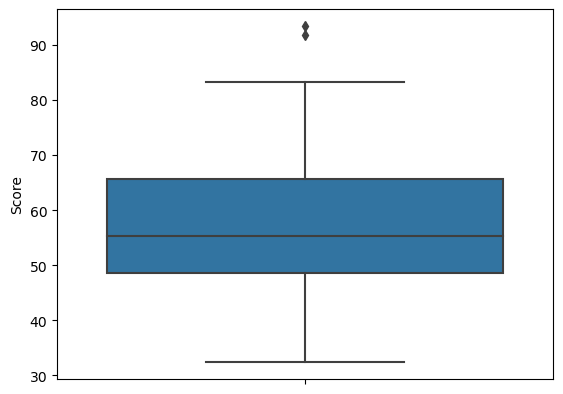

In [21]:
sb.boxplot(data=df1, y='Score')